In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

/Users/cwx/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Principal Component Analysis
Download the 48 industry portfolio data (monthly) from Kenneth French's web site. Use the
data from 1960 through 2023. Use the value-weighted returns. You may drop the industries
that have any missing values (which are reported as -99.99). Also, download the 3 Fama-
French factors from his web site. Use the monthly risk-free rate series provided by French in
the same FF factor dataset to compute excess returns on these 48 portfolios.



In [2]:
data = pd.read_csv('48_Industry_Portfolios.csv', skiprows=11)[:1171]
data = data.rename(columns={'Unnamed: 0':'Date'})
data = data[(data['Date'] >= '196001') & (data['Date'] <= '202312')]
data['Date'] = pd.to_datetime(data['Date'],format="%Y%m")
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric)
data = data.apply(lambda x: x.replace(-99.99, np.nan))
data.dropna(inplace=True)
data.set_index('Date',inplace=True)

In [3]:
mdata = pd.read_csv("F-F_Research_Data_Factors.csv", skiprows=3)
mdata = mdata.rename(columns={'Unnamed: 0':'Date'})
mdata = mdata[(mdata['Date'] >= '196001') & (mdata['Date'] <= '202312')]
mdata['Date'] = pd.to_datetime(mdata['Date'],format="%Y%m")
mdata.iloc[:, 1:] = mdata.iloc[:, 1:].apply(pd.to_numeric)
mdata.set_index('Date',inplace=True)

1. Get the eigenvalues for the sample variance-covariance matrix of the excess returns to
the 48 industries. Plot the fraction of total variance explained by each eigenvalue in a
bar plot (that is, plot each eigenvalue divided by the sum of all eigenvalues).

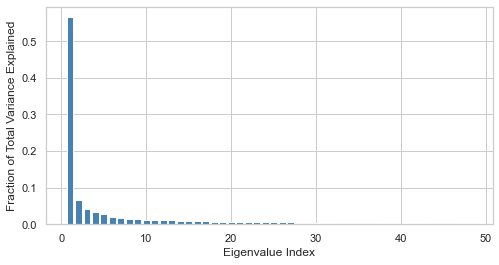

In [4]:
ex_return = data.copy()
for col in data.columns:
    ex_return[col] = data[col] - mdata['RF']
cov_matrix = ex_return.cov()
eigenvalues = np.linalg.eigvals(cov_matrix)
var_explained = eigenvalues / np.sum(eigenvalues)

sns.set(style='whitegrid')
plt.figure(figsize=(8,4))
plt.bar(range(1, len(var_explained) + 1), var_explained, color='steelblue')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Fraction of Total Variance Explained')
plt.show()

2. Choose the 3 First (largest) principal components.
(a) How much of the total variance do these 3 factors explain?


In [5]:
eig = np.linalg.eig(cov_matrix)
eigenvalues = eig[0]
eigenvectors = eig[1]

# Select the first three principal components
principal_components = eigenvectors[:, :3]

# Calculate the variance explained by the first three principal components
np.sum(eigenvalues[:3]) / np.sum(eigenvalues)


0.6716192763090831

(b) Give the mean sample return to these 3 factor portfolios, their standard deviation,
and correlation.


In [6]:
portfolios = np.dot(ex_return, principal_components)
mean_arr = np.mean(portfolios,axis=0)
var_arr = np.var(portfolios,axis=0)

print('Mean:', [round(value, 4) for value in mean_arr])
print('Standard Deviation:', [round(np.sqrt(value), 4) for value in var_arr])

Mean: [4.2878, -0.0124, -0.1892]
Standard Deviation: [35.2737, 11.9784, 9.4996]


In [7]:
pd.DataFrame(portfolios).corr()

,0,1,2
0,1.000000e+00,2.886621e-16,-2.170734e-17
1,2.886621e-16,1.000000e+00,4.038882e-16
2,-2.170734e-17,4.038882e-16,1.000000e+00


(c) Consider a multi-factor model of returns using these three factors as pricing fac
tors. Plot the predicted return from this model for all the industries versus the
realized average industry returns over the sample. That is, estimate the betas of
each industry with respect to these factors, get the expected excess returns as $E[R^e_{it}] = \hat{\beta}'_i\hat{E}[F_t]$
where Ft are the factor returns and $E[F_t]$ is estimated as the sample average of
each factor. This expected return will be on your x-axis. The sample average of
each industryís excess return will be on the y-axis. Add a 45 degree line to this
plot.
[You can get factor loadings (betas) from the eigenvectors. Or, if you like, you
can run the time-series regression of each industryís return on the 3 factors. The
result is the same.]


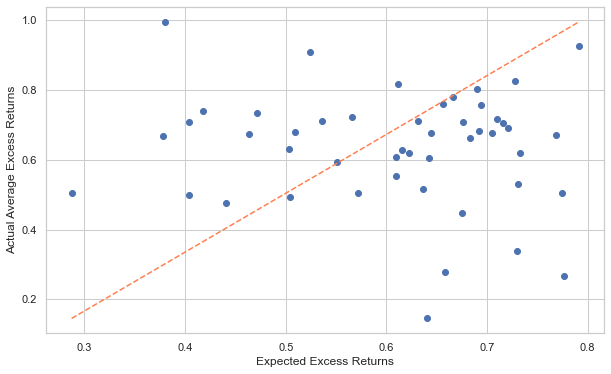

In [8]:
expected = np.dot(principal_components, mean_arr)
actual = np.mean(ex_return, axis=0)

plt.figure(figsize=(10,6))
plt.scatter(expected,actual)
plt.plot([min(expected), max(expected)], [min(actual), max(actual)],
         linestyle='dashed', color='coral')
plt.xlabel('Expected Excess Returns')
plt.ylabel('Actual Average Excess Returns')
plt.show()


(d) Give the implied cross-sectional R2 of the plot in c). That is, calculate:
$R^2_{cross-section} = 1 - \frac{Var(\bar{R}^{act} - \hat{R}^{pred})}{Var(\bar{R}^{act})}$

In [9]:
var_actual = np.var(actual)
var_diff = np.var(actual-expected)
1 - var_diff/var_actual

-0.6854854897946627

Now, download the 25 FF portfolios sorted on size and book-to-market, same sample
period. <br>
(a) Get the eigenvalues for the sample variance-covariance matrix of the excess re
turns to these 25 F-F portfolios. Plot the fraction of variance explained by each
eigenvalue in a bar plot.


In [10]:
data2 = pd.read_csv('25_Portfolios_5x5.csv', skiprows=15)[:1171]
data2 = data2.rename(columns={'Unnamed: 0':'Date'})
data2 = data2[(data2['Date'] >= '196001') & (data2['Date'] <= '202312')]
data2['Date'] = pd.to_datetime(data2['Date'],format="%Y%m")
data2.iloc[:, 1:] = data2.iloc[:, 1:].apply(pd.to_numeric)
data2 = data2.apply(lambda x: x.replace(-99.99, np.nan))
data2.dropna(inplace=True)
data2.set_index('Date',inplace=True)

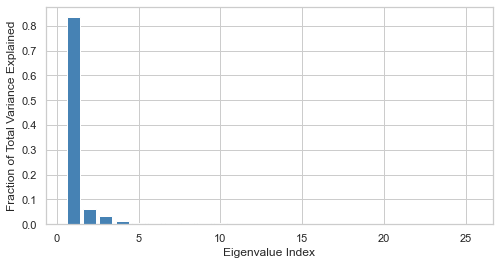

In [11]:
ex_return_2 = data2.copy()
for col in data2.columns:
    ex_return_2[col] = data2[col] - mdata['RF']
cov_matrix = ex_return_2.cov()
eigenvalues = np.linalg.eigvals(cov_matrix)
var_explained = eigenvalues / np.sum(eigenvalues)

sns.set(style='whitegrid')
plt.figure(figsize=(8,4))
plt.bar(range(1, len(var_explained) + 1), var_explained, color='steelblue')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Fraction of Total Variance Explained')
plt.show()

(b) Let's pick three of the 25 portfolios at random. So we all do the same thing, pick
(1) the portfolio in the second size and first bm bucket, (2) the portfolio in the
third size and the fifth bm bucket, and (3) the portfolio in the fifth size and third
bm bucket.
For each of the 22 remaining F-F portfolios, regress the portfolio return on the
three portfolio returns that you chose. Report the average R2 across these 22
portfolios.

In [12]:
chosed = ['ME2 BM1','ME3 BM5','ME5 BM3']
remained = [col for col in data2.columns if col not in chosed]

r_square = []
for c in remained:
    y = data2[c].fillna(0)
    X = sm.add_constant(data2[chosed]).fillna(0)
    model = sm.OLS(y, X).fit()
    r_square.append(model.rsquared)

np.mean(r_square)

0.861852263576766

(c) You should find that the R2s are very high. Relate this finding to the pattern in
the eigenvalues you found in a. Are you surprised about the high $R^2$ s or not?


Answer: The high R-squared values are not surprising in this context. It indicates that a substantial portion of the variability in the 22 remaining portfolios can be explained by the chosen three portfolios, which aligns with the dominance of the first principal component in explaining the variance in the data.

(d) For the sake of argument, letís say that all the R2s were 100%. That means
that instead of having 22 test assets you only have three test assets that are not
linearly dependent and that these are completely linearly spanned by the factors.
Intuitively, what do you think of a model test that tries to explain three average
returns with three coefcients? Could we ever reject this model?

Answer: It's highly likely that we would not reject the null hypothesis of no effect (i.e., the coefficients are equal to zero). This is because the model already perfectly explains the dependent variable, and adding more variables or information would not improve the fit.